# Sales data from my Distrokid Account

I make digital music and upload them on Distrokid which distributes them to different music streaming platforms and would like to analyze my performance.

Questions I would like to answer:
1. Which song has the most hits
2. which country has the most hits
3. do songs with older release dates have more hits than newer ones
4. Which store has the most sales

### Setup and import libraries

In [40]:
import pandas as pd
#from pandas import DataFrame as df
import matplotlib.pyplot as pltEarnings (USD)


In [52]:
m_data = pd.read_csv('distrokid_bank_lewasaur.tsv', sep='\t')
# Dataset downloaded directly from Distrokid

In [15]:
m_data.shape

(160, 13)

In [16]:
m_data.head()

,Reporting Date,Sale Month,Store,Artist,Title,ISRC,UPC,Quantity,Team Percentage,Song/Album,Country of Sale,Songwriter Royalties Withheld,Earnings (USD)
0,2021-11-24,2021-09,spotify,lewasaur,celestial spark,QZMEQ2183637,196400657231,47,100,Song,PH,0,0.042168
1,2021-11-24,2021-09,spotify,lewasaur,celestial spark,QZMEQ2183637,196400657231,4,100,Song,US,0,0.022279
2,2021-11-24,2021-09,spotify,lewasaur,celestial spark,QZMEQ2183637,196400657231,0,100,Song,PH,0,0.005672
3,2021-11-24,2021-09,spotify,lewasaur,serene nights and pristine sights,QZMEQ2183639,196400657231,43,100,Song,PH,0,0.036937
4,2021-11-24,2021-09,spotify,lewasaur,serene nights and pristine sights,QZMEQ2183639,196400657231,2,100,Song,US,0,0.011139


### Cleaning the data by making a new Dataframe

In [17]:
m_columns = ['Sale Month', 'Store', 'Title', 'Quantity', 'Country of Sale', 'Earnings (USD)']
new_data = m_data[m_columns].copy()
new_data.describe()

,Quantity,Earnings (USD)
count,160.000000,160.000000
mean,36.100000,0.046353
std,62.877159,0.079918
min,0.000000,0.000037
25%,1.000000,0.001192
50%,2.000000,0.006109
75%,39.250000,0.040269
max,233.000000,0.296898


In [18]:
new_data.head()

,Sale Month,Store,Title,Quantity,Country of Sale,Earnings (USD)
0,2021-09,spotify,celestial spark,47,PH,0.042168
1,2021-09,spotify,celestial spark,4,US,0.022279
2,2021-09,spotify,celestial spark,0,PH,0.005672
3,2021-09,spotify,serene nights and pristine sights,43,PH,0.036937
4,2021-09,spotify,serene nights and pristine sights,2,US,0.011139


In [19]:
new_data.describe()

,Quantity,Earnings (USD)
count,160.000000,160.000000
mean,36.100000,0.046353
std,62.877159,0.079918
min,0.000000,0.000037
25%,1.000000,0.001192
50%,2.000000,0.006109
75%,39.250000,0.040269
max,233.000000,0.296898


### Determining which store has the most sales

In [20]:
# Which stores have the most sales
store_series = new_data['Store'].value_counts()
print(store_series)

spotify             141
youtube              15
amazon unlimited      1
yandex                1
tidal                 1
youtube red           1
Name: Store, dtype: int64


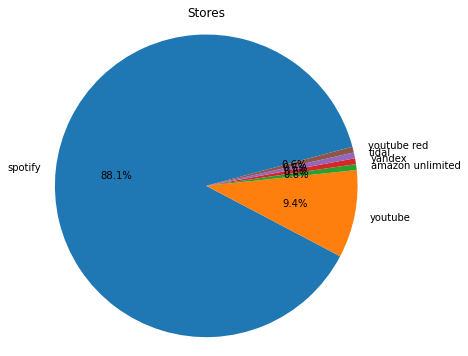

In [26]:
#4

store_list = ['spotify', 'youtube', 'amazon unlimited', 'yandex', 'tidal', 'youtube red']
plt.figure(figsize=(6,6))
plt.pie(store_series,labels=store_list,autopct='%1.1f%%', startangle=15)
plt.title('Stores')
plt.axis('equal')
plt.show()

It seems like majority of the sales are from **spotify** while *youtube* is the 2nd contributor with only 9.4% where the rest of the stores only contribute less than 1% each.

In [21]:

song_series = new_data['Title'].value_counts()
print(song_series)

don't worry nt                       29
comfortville                         27
eternal bliss                        24
sadskie                              21
happy hydration                      16
celestial spark                      13
serene nights and pristine sights    12
cold strawberry milk box             10
mellow cutie starlight                8
Name: Title, dtype: int64


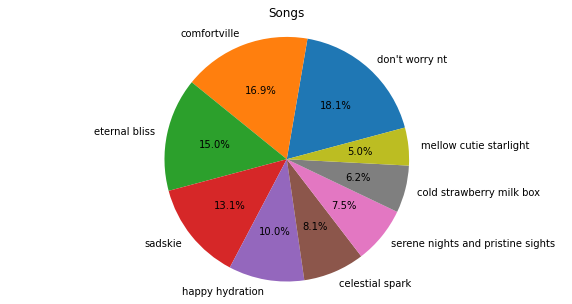

In [23]:
#1

song_list = ['don\'t worry nt', 'comfortville', 'eternal bliss', 'sadskie', 'happy hydration', 'celestial spark',
             'serene nights and pristine sights', 'cold strawberry milk box', 'mellow cutie starlight']
plt.figure(figsize=(10,5))
plt.pie(song_series,labels=song_list,autopct='%1.1f%%', startangle=15)
plt.title('Songs')
plt.axis('equal')
plt.show()

The song with the most plays is **don't worry nt** with *18.1%* of the total plays are from that song while the 2nd most played song is **comfortville** comes close with *16.9%*.

In [47]:
#The release dates of each song is as follows
song_timeline_list = {'song_name': ['comfortville', 'celestial spark', 'eternal bliss', 'serene nights and pristine sights',
                               'sadskie', 'happy hydration', 'don\'t worry nt', 'cold strawberry milk box',
                               'mellow cutie starlight'], 'release_date': ['2021-10', '2021-10',
                                                                          '2021-10', '2021-10', '2021-10', '2021-10',
                                                                          '2021-11', '2022-1', '2022-1']}
song_timeline_data = pd.DataFrame(data=song_timeline_list)

song_timeline_data.head(9)

,song_name,release_date
0,comfortville,2021-10
1,celestial spark,2021-10
2,eternal bliss,2021-10
3,serene nights and pristine sights,2021-10
4,sadskie,2021-10
5,happy hydration,2021-10
6,don't worry nt,2021-11
7,cold strawberry milk box,2022-1
8,mellow cutie starlight,2022-1


The song that has the most number of plays is **don't worry nt** and it was release a month later than 6 other songs. So a song released later has a chance to still outplay the older songs released.

In [70]:
country_sale_data = new_data.groupby(['Country of Sale'])['Quantity'].sum()
country_sale_data.sort_values(ascending=False)

Country of Sale
PH    5588
US      60
IT      43
ID      12
MX       7
FR       7
MY       7
CA       5
AU       4
ES       4
CL       4
RU       3
TW       3
PL       2
IN       2
VN       2
JP       2
BR       2
NL       2
TH       2
SG       2
SE       2
UA       1
GB       1
RO       1
QA       1
HK       1
CO       1
PE       1
DE       1
LT       1
DK       1
ZA       1
Name: Quantity, dtype: int64

**PH** Has the most sales with 5588 plays where the other Countries did not even come close as the 2nd contributor is *US* with only 60 plays.

# Conclusions

1. **don't worry nt** has the most plays out of all the songs.
2. **PH** has the most amount of plays. This might be because I'm from PH too and I've marketed my songs mostly to friends and strangers who are from PH too.
3. It's possible to release a new song and have it get more plays than the older songs. As seen by **don't worry nt** outperforming all the other songs despite not being the oldest released song. And newest songs like **cold strawberry milk box** and **mellow cutie starlight** having close scores with songs that were released first. A possibility for these happening is that they generally have higher qualities so people prefer them or I have done a better job at marketing them.
4. Most of the plays are from **Spotify**. I have mostly marketed and showed people my works through spotify as most people I know are comfortable with Spotify and is generally easier to use.